
### Attempting Global Infection Data Analysis Again

We will now attempt to analyze the global infection data once more.
```

In [5]:
import pandas as pd

# Read the Excel file
try:
    df = pd.read_excel('world_covid.xlsx')
    print("Excel file read successfully")
except FileNotFoundError:
    print("File not found, please check the file path")
    raise

# Assume there is a 'date' column and a 'new_cases' column in the data
# Convert the 'date' column to datetime type
try:
    df['date'] = pd.to_datetime(df['date'])
    print("Date column converted successfully")
except KeyError:
    print("Date column 'date' not found, please check the column name")
    raise

# Group by month and calculate the total cases for each month
try:
    df['month'] = df['date'].dt.to_period('M')
    monthly_cases = df.groupby('month')['new_cases'].sum()
    print("Monthly cases calculated successfully")
except KeyError:
    print("Cases column 'new_cases' not found, please check the column name")
    raise

# Save the result in a new DataFrame
result_df_world = pd.DataFrame({
    'month': monthly_cases.index.astype(str),
    'new_cases': monthly_cases.values
})

# Display the result
print(result_df_world)

Excel file read successfully
Date column converted successfully
Monthly cases calculated successfully
      month  new_cases
0   2020-01       2033
1   2020-02      76214
2   2020-03     611707
3   2020-04    2037922
4   2020-05    3163451
5   2020-06    3936842
6   2020-07    6074723
7   2020-08    9261926
8   2020-09    8143085
9   2020-10   10187462
10  2020-11   19566436
11  2020-12   17255870
12  2021-01   22070633
13  2021-02   11022033
14  2021-03   12861645
15  2021-04   19601773
16  2021-05   23734840
17  2021-06   10822935
18  2021-07   13410750
19  2021-08   22253836
20  2021-09   15484337
21  2021-10   15086099
22  2021-11   14569045
23  2021-12   19380554
24  2022-01   94694159
25  2022-02   59761654
26  2022-03   46082485
27  2022-04   26970423
28  2022-05   18751417
29  2022-06   15145267
30  2022-07   32981058
31  2022-08   22850430
32  2022-09   14173487
33  2022-10   15057500
34  2022-11   10483582
35  2022-12   67065915
36  2023-01   47674052
37  2023-02    4851818
3

In [6]:
import pandas as pd
from dateutil import parser

# Read the existing result_df DataFrame
# Assume result_df already exists and contains 'month' and 'new_cases' columns

# Convert the 'month' column in result_df to Period type
result_df_world['month'] = pd.to_datetime(result_df_world['month']).dt.to_period('M')

# Read the Monthly_figures_on_aviation CSV file
aviation_df = pd.read_csv('Monthly_figures_on_aviation.csv')

# Assume aviation_df has a date column 'Periods' and other data columns
# Use dateutil.parser to parse the date column
aviation_df['date'] = aviation_df['Periods'].apply(lambda x: parser.parse(x, fuzzy=True))

# Group by month
aviation_df['month'] = aviation_df['date'].dt.to_period('M')

# Drop the original date column
aviation_df = aviation_df.drop(columns=['Periods'])

# Merge the two DataFrames by month, filling unmatched months with 0 for new_cases
merged_df = pd.merge(result_df_world, aviation_df, on='month', how='outer').fillna({'new_cases': 0})

# Display the result
print(merged_df)

      month  new_cases              Airports  \
0   2019-01        0.0  Total Dutch airports   
1   2019-02        0.0  Total Dutch airports   
2   2019-03        0.0  Total Dutch airports   
3   2019-04        0.0  Total Dutch airports   
4   2019-05        0.0  Total Dutch airports   
..      ...        ...                   ...   
63  2024-04   147440.0  Total Dutch airports   
64  2024-05   136159.0  Total Dutch airports   
65  2024-06   190568.0  Total Dutch airports   
66  2024-07   201714.0  Total Dutch airports   
67  2024-08    47169.0  Total Dutch airports   

    Aircraft movements/Cross-country flights (number)  \
0                                               43492   
1                                               41972   
2                                               47712   
3                                               51400   
4                                               55561   
..                                                ...   
63                      

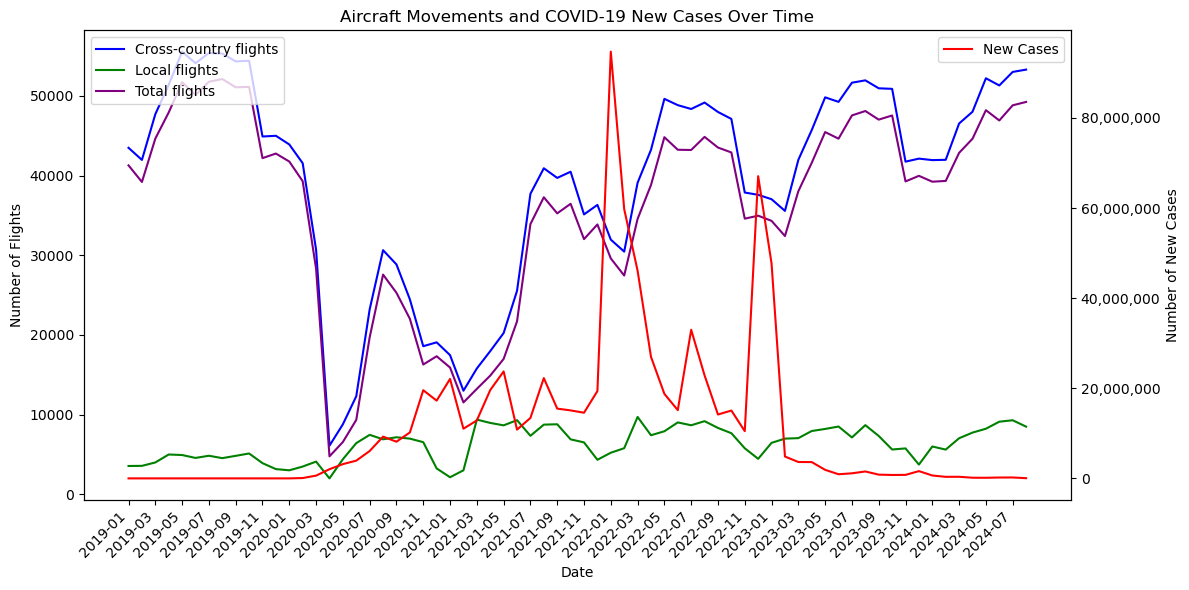

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert 'month' column to string format for plotting
merged_df['month'] = merged_df['month'].astype(str)

# Set the figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first three columns as line charts on the first y-axis
ax1.plot(merged_df['month'], merged_df['Aircraft movements/Cross-country flights (number)'], label='Cross-country flights', color='blue')
ax1.plot(merged_df['month'], merged_df['Aircraft movements/Local flights (number)'], label='Local flights', color='green')
ax1.plot(merged_df['month'], merged_df['Commercial air traffic/Flights/All flights/Total flights (number)'], label='Total flights', color='purple')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Flights')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases')
ax2.legend(loc='upper right')

# Format the second y-axis to remove scientific notation
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the plot
plt.show()

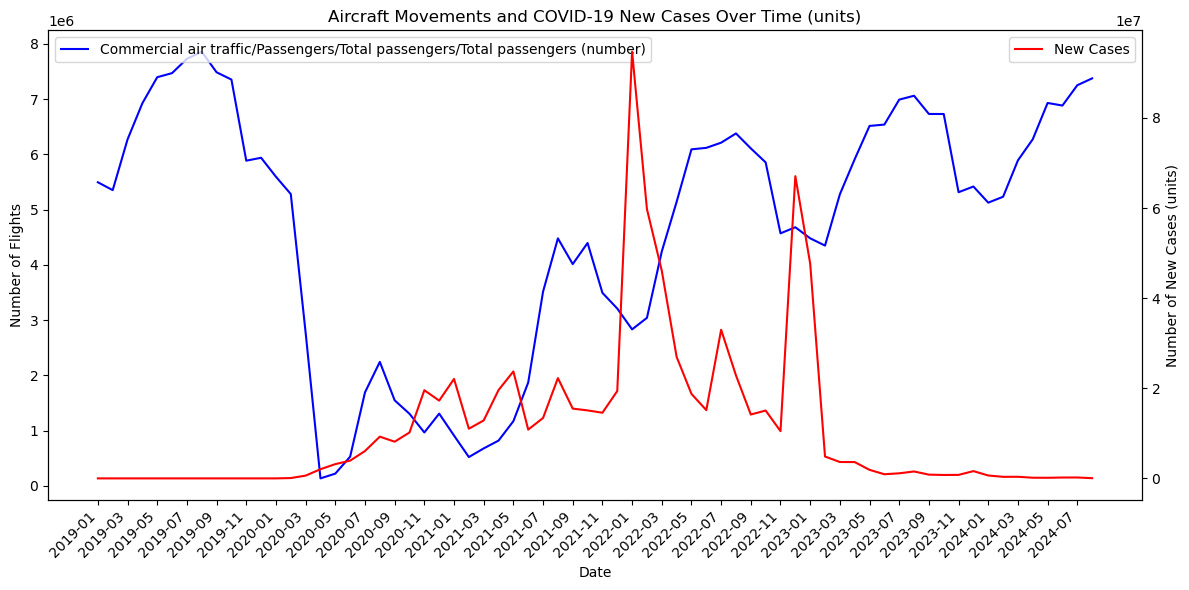

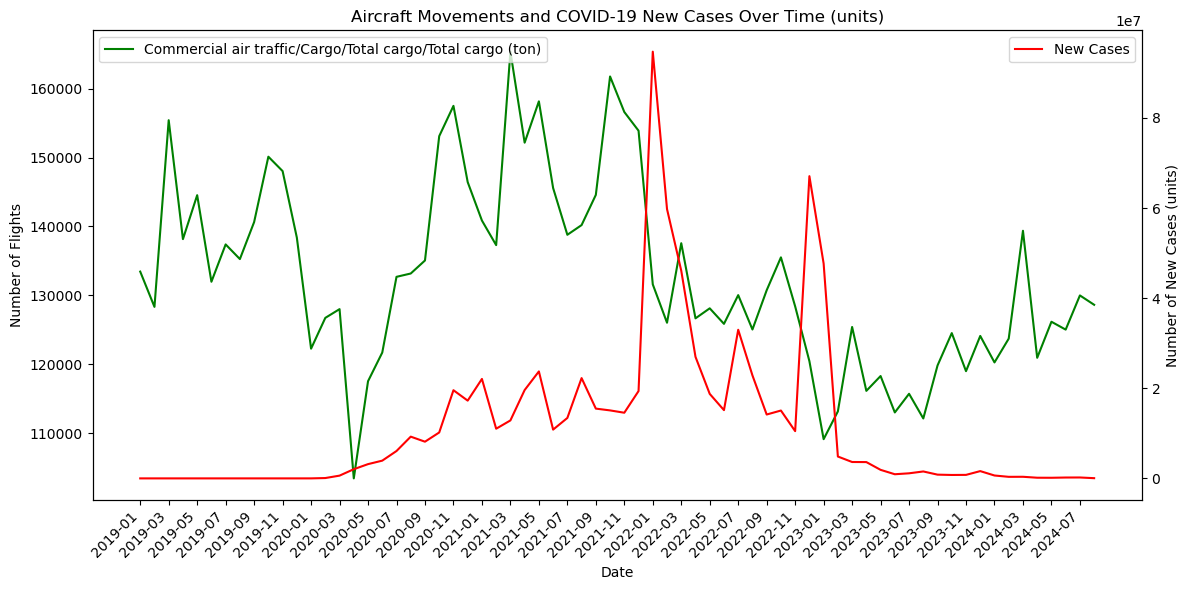

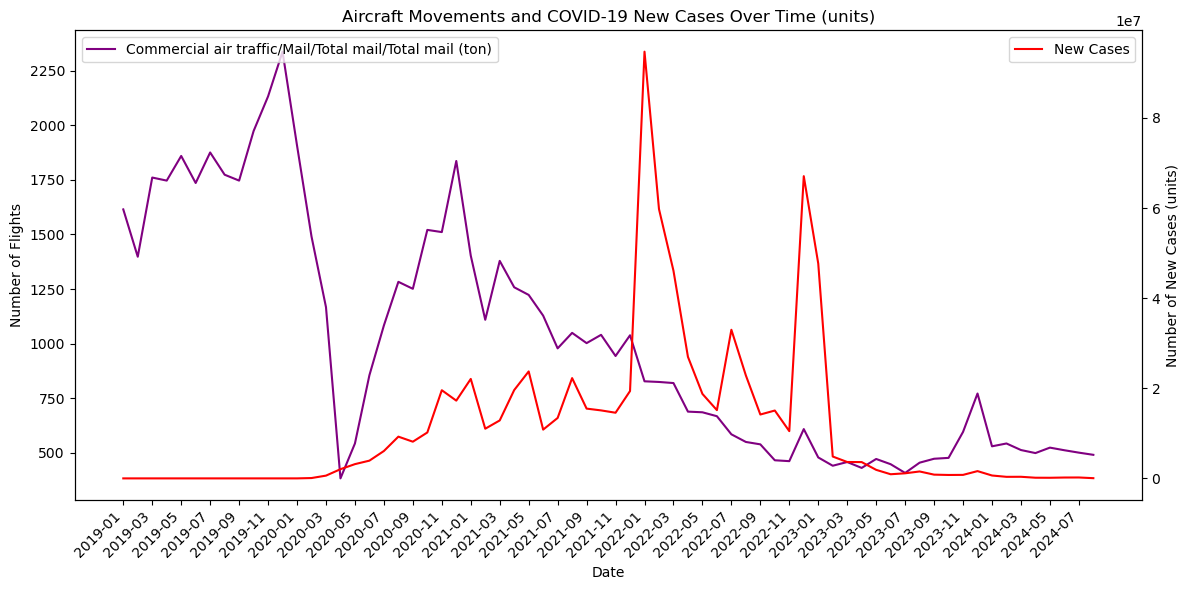

In [8]:
import matplotlib.pyplot as plt

# Convert 'month' column to string format for plotting
merged_df['month'] = merged_df['month'].astype(str)

# Set the figure size for the first plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first of the last three columns as a line chart on the first y-axis
ax1.plot(merged_df['month'], merged_df.iloc[:, -4], label=merged_df.columns[-4], color='blue')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Flights')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time (units)')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases (units)')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the first plot
plt.show()

# Set the figure size for the second plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the second of the last three columns as a line chart on the first y-axis
ax1.plot(merged_df['month'], merged_df.iloc[:, -3], label=merged_df.columns[-3], color='green')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Flights')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time (units)')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases (units)')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the second plot
plt.show()

# Set the figure size for the third plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the third of the last three columns as a line chart on the first y-axis
ax1.plot(merged_df['month'], merged_df.iloc[:, -2], label=merged_df.columns[-2], color='purple')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Flights')
ax1.set_title('Aircraft Movements and COVID-19 New Cases Over Time (units)')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
ax1.set_xticks(ax1.get_xticks()[::2])  # Show every second label
ax1.set_xticklabels(merged_df['month'][::2], rotation=45, ha='right')

# Create a second y-axis for the new cases
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['new_cases'], label='New Cases', color='red')

# Set the label for the second y-axis with unit
ax2.set_ylabel('Number of New Cases (units)')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of tick-labels
fig.tight_layout()

# Show the third plot
plt.show()

In [9]:
# 计算每个变量和感染人数之间的相关系数
correlation_with_cases = {}

# 遍历 merged_df 中的每一列，计算与 new_cases 的相关系数
for column in merged_df.columns:
    # Exclude columns that are not relevant for correlation calculation
    if column not in ['new_cases', 'date', 'month', 'Airports'] and merged_df[column].dtype in ['int64', 'float64']:
        correlation_with_cases[column] = merged_df['new_cases'].corr(merged_df[column])

# 将结果转换为 Series 并按相关系数排序
correlation_with_cases = pd.Series(correlation_with_cases).sort_values(ascending=False)

# 显示结果
print(correlation_with_cases)

Aircraft movements/Local flights (number)                                       0.111562
Commercial air traffic/Cargo/Total cargo/Total cargo (ton)                      0.061415
Commercial air traffic/Mail/Total mail/Total mail (ton)                        -0.163440
Aircraft movements/Cross-country flights (number)                              -0.252523
Commercial air traffic/Flights/All flights/Total flights (number)              -0.261317
Commercial air traffic/Flights/All flights/Scheduled (number)                  -0.262728
Commercial air traffic/Passengers/Total passengers/Total passengers (number)   -0.299222
dtype: float64


In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# List of variables for regression analysis
variables = [
    'Aircraft movements/Local flights (number)',
    'Commercial air traffic/Flights/All flights/Total flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# Prepare data
X = merged_df[['new_cases']]  # Convert X to DataFrame

# Iterate over each variable and perform linear regression
for variable in variables:
    Y = merged_df[[variable]]  # Convert Y to DataFrame
    
    # Create linear regression model
    model = LinearRegression()
    
    # Fit the model
    model.fit(X, Y)
    
    # Output regression coefficients
    coefficient = model.coef_[0][0]
    print(f"Coefficient for {variable}: {coefficient}")
    
    # Output intercept
    intercept = model.intercept_[0]
    print(f"Intercept for {variable}: {intercept}")
    
    # Calculate R^2
    r_squared = model.score(X, Y)
    print(f"R^2 for {variable}: {r_squared}\n")

Coefficient for Aircraft movements/Local flights (number): 1.3201143811507558e-05
Intercept for Aircraft movements/Local flights (number): 6194.467201825774
R^2 for Aircraft movements/Local flights (number): 0.01244599332928431

Coefficient for Commercial air traffic/Flights/All flights/Total flights (number): -0.00018512998950048445
Intercept for Commercial air traffic/Flights/All flights/Total flights (number): 38218.05660228629
R^2 for Commercial air traffic/Flights/All flights/Total flights (number): 0.068286680198269

Coefficient for Commercial air traffic/Passengers/Total passengers/Total passengers (number): -0.038948333415613365
Intercept for Commercial air traffic/Passengers/Total passengers/Total passengers (number): 5111760.916307338
R^2 for Commercial air traffic/Passengers/Total passengers/Total passengers (number): 0.08953360204106742

Coefficient for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 4.76767978446442e-05
Intercept for Commercial air traffic/Carg

Coefficient for Aircraft movements/Local flights (number): 1.3201143811507558e-05
Intercept for Aircraft movements/Local flights (number): 6194.467201825774
R^2 for Aircraft movements/Local flights (number): 0.01244599332928431



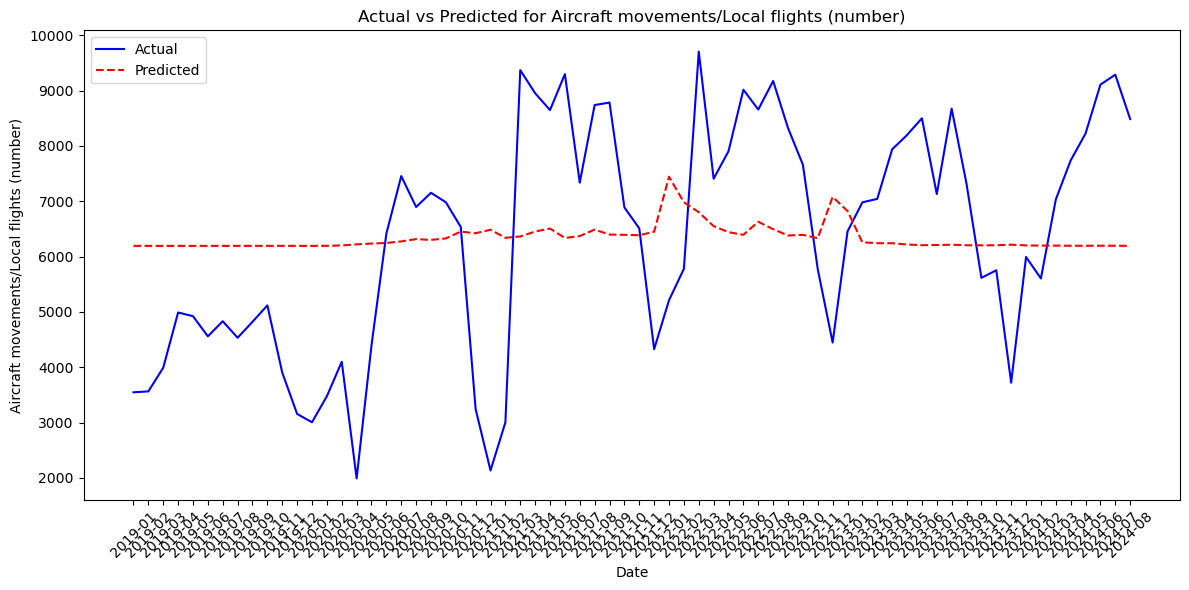

Coefficient for Commercial air traffic/Flights/All flights/Total flights (number): -0.00018512998950048445
Intercept for Commercial air traffic/Flights/All flights/Total flights (number): 38218.05660228629
R^2 for Commercial air traffic/Flights/All flights/Total flights (number): 0.068286680198269



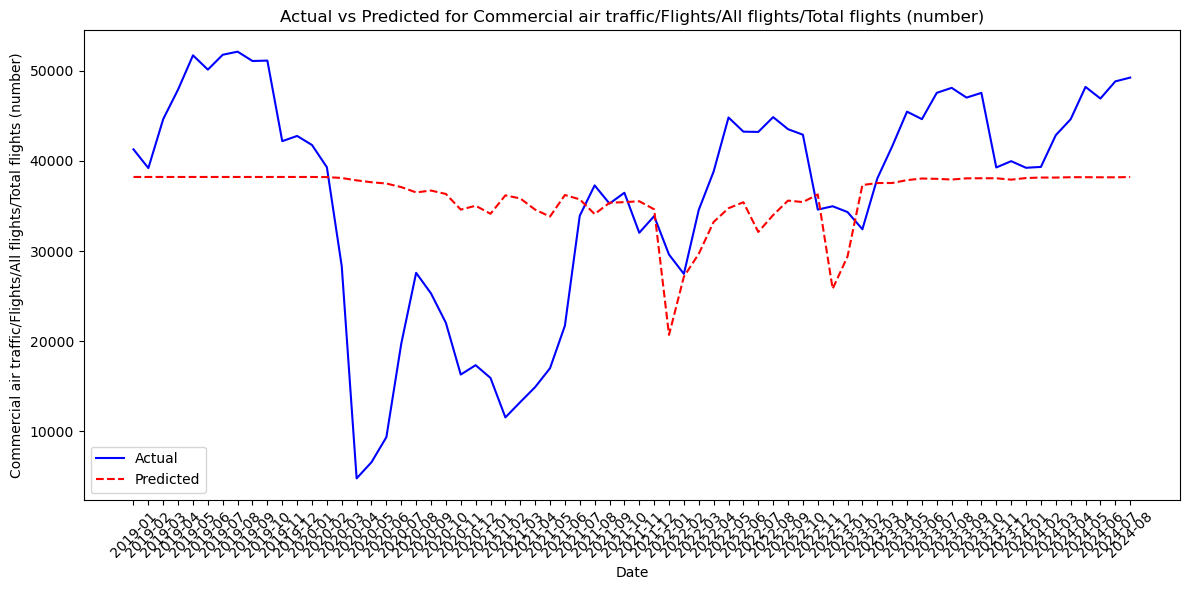

Coefficient for Commercial air traffic/Passengers/Total passengers/Total passengers (number): -0.038948333415613365
Intercept for Commercial air traffic/Passengers/Total passengers/Total passengers (number): 5111760.916307338
R^2 for Commercial air traffic/Passengers/Total passengers/Total passengers (number): 0.08953360204106742



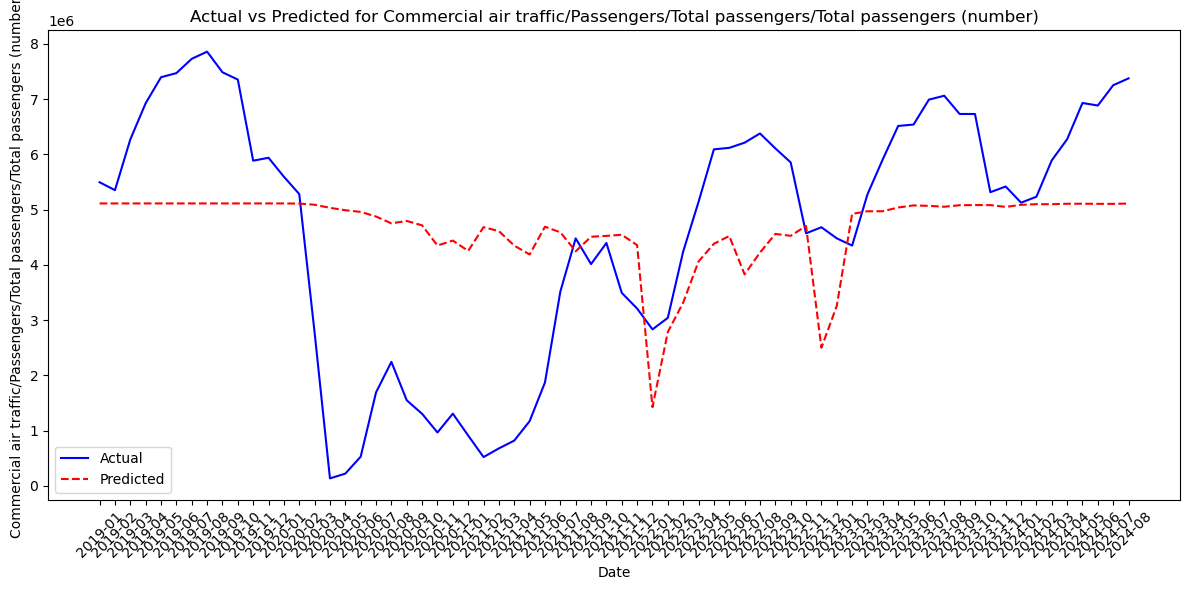

Coefficient for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 4.76767978446442e-05
Intercept for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 132175.3808992182
R^2 for Commercial air traffic/Cargo/Total cargo/Total cargo (ton): 0.00377183768229461



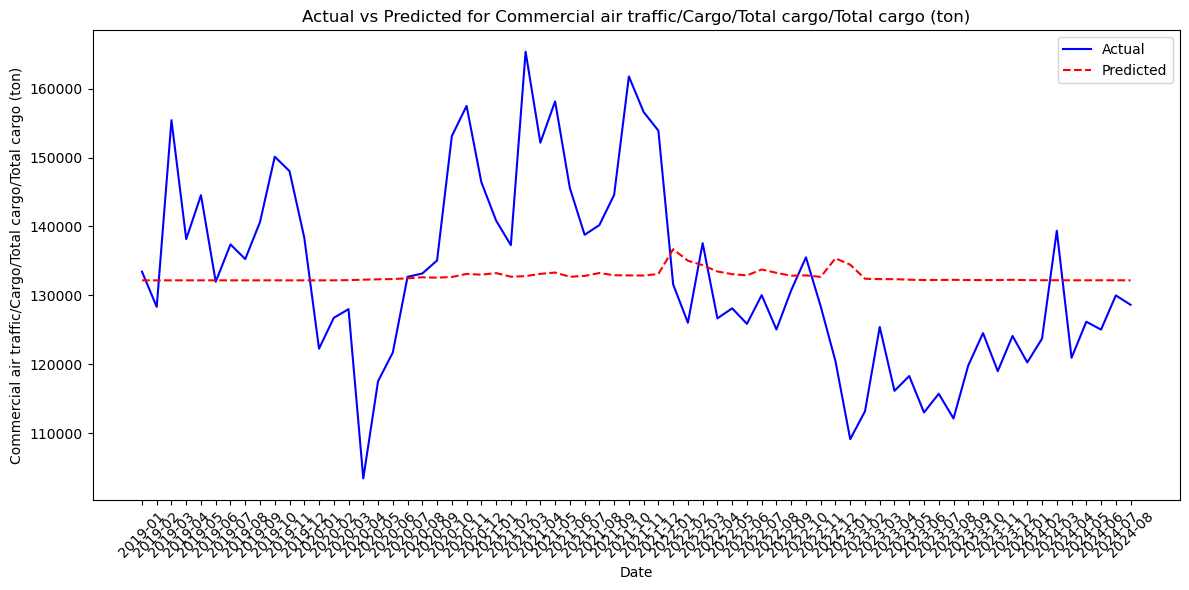

Coefficient for Commercial air traffic/Mail/Total mail/Total mail (ton): -4.991903830006288e-06
Intercept for Commercial air traffic/Mail/Total mail/Total mail (ton): 1057.8146056305065
R^2 for Commercial air traffic/Mail/Total mail/Total mail (ton): 0.02671279535464821



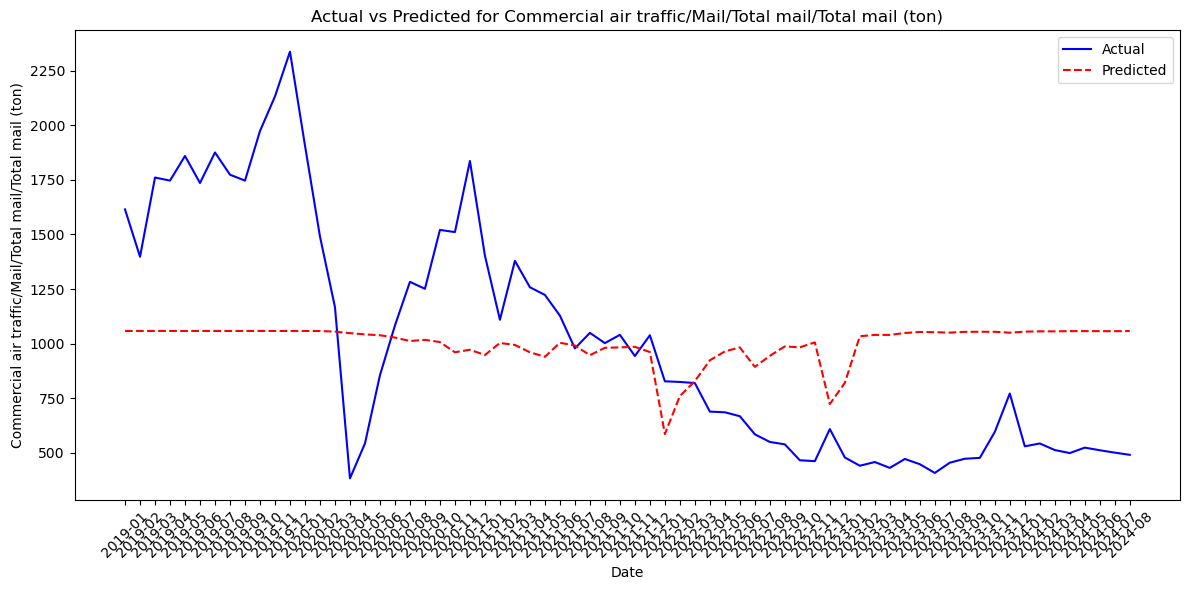

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# List of variables for regression analysis
variables = [
    'Aircraft movements/Local flights (number)',
    'Commercial air traffic/Flights/All flights/Total flights (number)',
    'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
    'Commercial air traffic/Cargo/Total cargo/Total cargo (ton)',
    'Commercial air traffic/Mail/Total mail/Total mail (ton)'
]

# Prepare data
X = merged_df[['new_cases']]  # Convert X to DataFrame

# Iterate over each variable and perform linear regression
for variable in variables:
    Y = merged_df[[variable]]  # Convert Y to DataFrame
    
    # Create linear regression model
    model = LinearRegression()
    
    # Fit the model
    model.fit(X, Y)
    
    # Predict
    y_pred = model.predict(X)
    
    # Output regression coefficients
    coefficient = model.coef_[0][0]
    print(f"Coefficient for {variable}: {coefficient}")
    
    # Output intercept
    intercept = model.intercept_[0]
    print(f"Intercept for {variable}: {intercept}")
    
    # Calculate R^2
    r_squared = model.score(X, Y)
    print(f"R^2 for {variable}: {r_squared}\n")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['month'], Y, label='Actual', color='blue')
    plt.plot(merged_df['month'], y_pred, label='Predicted', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.title(f'Actual vs Predicted for {variable}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()